# Image Processing with SVM

CS189

Author: Group 3 (Tim Yang*, Will Romano, Tate Toussaint, Scott Dayton)

11/11/2022

### SVM with Feature Extraction

#### 1. Taking Input

In [184]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)\

import joblib
from skimage.io import imread
from skimage.transform import resize

# Function to preprocess data and store them in pickle
def resize_all(src, pklname, include, width=150, height=None):

    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})retinal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                # if file[-3:] in {'jpg', 'png', 'tiff'}:
                if file[-3:] in {'jpg', 'png'} or file[-4:] in {'tiff'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir)
                    print(data['label'])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)
    
# data_path = 'images'
# os.listdir(data_path)

In [185]:
base_name = 'categories'
width = 8

include = {'ARMD', 'ASR', 'BRVO', 'CNV', 'CRS', 'CRVO', 'CSR', 'DN', 'DR', 'HTR', 'LS', 'MH', 'MYA','NORMAL', 'ODC', 'ODE', 'ODP', 'Other', 'RS', 'TSLN'}

# Only need to run once as data is stored in pickle
# resize_all(src=data_path, pklname=base_name, width=width, include=include)

ARMD
['ARMD']
['ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD', 'ARMD']
['ARMD', 'ARMD', 'AR

In [199]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  726
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)retinal images in rgb
image shape:  (80, 80, 3)
labels: ['ARMD' 'ASR' 'BRVO' 'CNV' 'CRS' 'CRVO' 'CSR' 'DN' 'DR' 'HTR' 'LS' 'MH'
 'MYA' 'NORMAL' 'ODC' 'ODE' 'ODP' 'Other' 'RS' 'TSLN']


Counter({'ARMD': 41,
         'ASR': 15,
         'BRVO': 31,
         'CNV': 17,
         'CRS': 11,
         'CRVO': 23,
         'CSR': 20,
         'DN': 49,
         'DR': 136,
         'HTR': 10,
         'LS': 13,
         'MH': 63,
         'MYA': 16,
         'NORMAL': 29,
         'ODC': 61,
         'ODE': 14,
         'ODP': 19,
         'Other': 92,
         'RS': 23,
         'TSLN': 43})

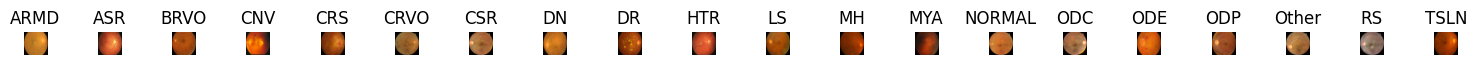

In [200]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [213]:
X = np.array(data['data'])
y = np.array(data['label'])

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    shuffle=True,
    random_state=37,
)

def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
    plt.suptitle('relative amount of photos per type')
    plot_bar(y_train, loc='left')
    plot_bar(y_test, loc='right')
    plt.legend([
        'train ({0} photos)'.format(len(y_train)), 
        'test ({0} photos)'.format(len(y_test))
    ]);

#### 2. Feature Processing

In [203]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
from sklearn.base import BaseEstimator, TransformerMixin

# Converts an array of RGB images to grayscale
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass
 
    # Returns itself
    def fit(self, X, y=None):
        return self

    # Performs the transformation and return an array
    def transform(self, X, y=None):
        return np.array([skimage.color.rgb2gray(img) for img in X])
    
# Takes an array of 2d arrays (1 channel images), calculates hog features for each img
class HogTransformer(BaseEstimator, TransformerMixin):
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])
        
        
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(544, 576)


#### 3. Training

In [204]:
sgd_clf = SGDClassifier(random_state=37, max_iter=100, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(max_iter=100, random_state=37)

#### 4. Testing

In [207]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[False False False False  True False False False False  True False False
 False False False False False False False  True False False False False
 False]

Percentage correct:  15.934065934065934


In [192]:
#### 5. Construct Confusion Matrix

['yes', 'no']


C:\Users\timot\AppData\Local\Temp\ipykernel_19740\109260116.py:40: RuntimeWarning: invalid value encountered in divide
  cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)



 ['ARMD', 'ASR', 'BRVO', 'CNV', 'CRVO', 'CSR', 'DN', 'DR', 'HTR', 'LS', 'MH', 'MYA', 'NORMAL', 'ODC', 'ODE', 'ODP', 'Other', 'RS', 'TSLN']


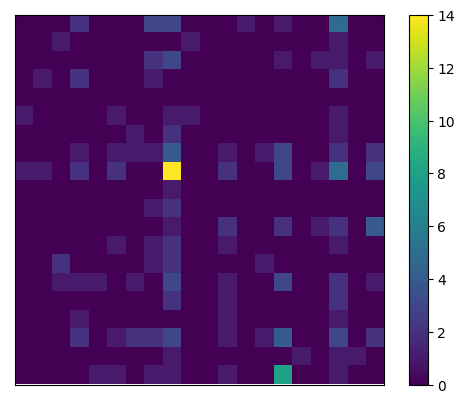

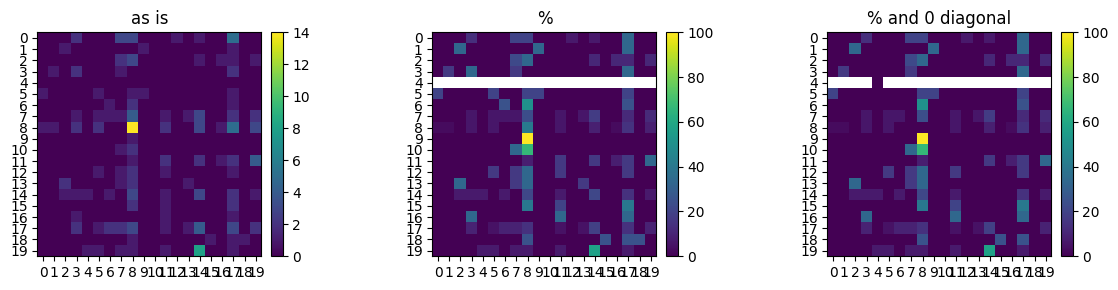

In [208]:
import pandas as pd

labels = ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',  'no', 'no', 'no']
predictions = ['yes', 'yes', 'yes', 'yes', 'no',  'no',  'yes', 'no', 'no', 'no']
 
# put the data in a dataframe for pretty printing
df = pd.DataFrame(
    np.c_[labels, predictions], 
    columns=['true_label', 'prediction']
)
df

from sklearn.metrics import confusion_matrix
 
label_names = ['yes', 'no']
print(label_names)
cmx2 = confusion_matrix(labels, predictions, labels=label_names)
df = pd.DataFrame(cmx2, columns=label_names, index=label_names)

df.columns.name = 'prediction'
df.index.name = 'label'
df

cmx = confusion_matrix(y_test, y_pred)
cmx

plt.imshow(cmx)
plt.xticks([])
plt.yticks([])
plt.colorbar();

from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
     
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_test)))

In [194]:
#### 6. Optimization

In [209]:
from sklearn.pipeline import Pipeline
from sklearn import svm
 
HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', SGDClassifier(random_state=37, max_iter=100, tol=1e-3))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
print('Percentage correct: ', 100*np.sum(clf.predict(X_test) == y_test)/len(y_test))


from sklearn.model_selection import GridSearchCV
 
param_grid = [
    {
        'hogify__orientations': [8, 9],
        'hogify__cells_per_block': [(2, 2), (3, 3)],
        'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12), (14, 14), (16, 16)]
    },
    {
        'hogify__orientations': [8],
         'hogify__cells_per_block': [(3, 3)],
         'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12), (14, 14)],
         'classify': [
             SGDClassifier(random_state=37, max_iter=100, tol=1e-3),
             svm.SVC(kernel='linear')
         ]
    }
]

grid_search = GridSearchCV(HOG_pipeline, 
                           param_grid, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=3,
                           return_train_score=True, pre_dispatch =  '64*n_jobs')
 
grid_res = grid_search.fit(X_train, y_train)

print("done!")

Percentage correct:  15.934065934065934
Fitting 3 folds for each of 28 candidates, totalling 84 fits
done!


In [210]:
# save the model to disk
joblib.dump(grid_res, 'hog_sgd_model.pkl');

# description of the best performing object, a pipeline in our case.
grid_res.best_estimator_

Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify', HogTransformer(orientations=8)),
                ('scalify', StandardScaler()),
                ('classify', SVC(kernel='linear'))])

{   'classify': SVC(kernel='linear'),
    'hogify__cells_per_block': (3, 3),
    'hogify__orientations': 8,
    'hogify__pixels_per_cell': (8, 8)}
Percentage correct:  17.582417582417584


C:\Users\timot\AppData\Local\Temp\ipykernel_19740\109260116.py:40: RuntimeWarning: invalid value encountered in divide
  cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)


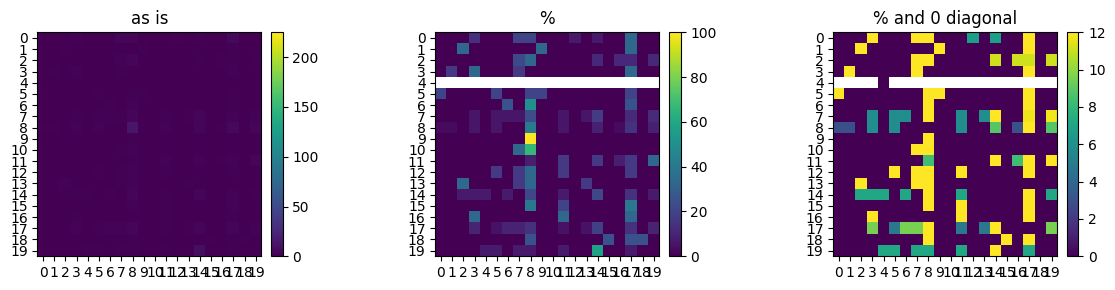

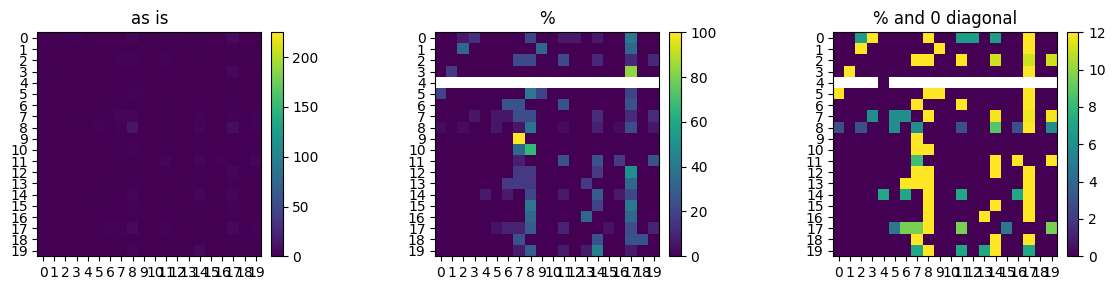

In [211]:
from sklearn.svm import SVC

Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify', HogTransformer(orientations=8)),
                ('scalify', StandardScaler()),
                ('classify', SVC(kernel='linear'))])


# the highscore during the search
grid_res.best_score_

pp.pprint(grid_res.best_params_)


best_pred = grid_res.predict(X_test)
print('Percentage correct: ', 100*np.sum(best_pred == y_test)/len(y_test))


cmx_svm = confusion_matrix(y_test, best_pred)

plot_confusion_matrix(cmx, vmax1=225, vmax2=100, vmax3=12)

plot_confusion_matrix(cmx_svm, vmax1=225, vmax2=100, vmax3=12)

In [212]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score



print("The predicted Data is :")
print(best_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(best_pred,y_test)*100}% accurate")



recall = precision_recall_fscore_support(y_test,best_pred, average='macro')
print(f"The model has {recall}% precision & recall rate.")


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, best_pred, target_names=['ARMD', 'ASR', 'BRVO', 'CNV', 'CRS', 'CRVO', 'CSR', 'DN', 'DR', 'HTR', 'LS', 'MH', 'MYA', 'NORMAL', 'ODC', 'ODE', 'ODP', 'Other', 'RS', 'TSLN']))

The predicted Data is :
['DN' 'Other' 'ODC' 'DR' 'DR' 'Other' 'DR' 'DR' 'Other' 'Other' 'DR'
 'NORMAL' 'DN' 'Other' 'DR' 'Other' 'DN' 'Other' 'MH' 'DR' 'Other' 'DR'
 'Other' 'Other' 'ODE' 'DR' 'DN' 'Other' 'Other' 'DR' 'DN' 'DR' 'ODP' 'MH'
 'Other' 'DN' 'Other' 'TSLN' 'BRVO' 'Other' 'CRVO' 'Other' 'MH' 'DR'
 'Other' 'Other' 'DN' 'DR' 'CSR' 'MH' 'DR' 'DN' 'DR' 'TSLN' 'DR' 'DN' 'MH'
 'Other' 'Other' 'CNV' 'HTR' 'Other' 'DR' 'ARMD' 'MH' 'DR' 'ODC' 'ODC'
 'CSR' 'ODC' 'TSLN' 'Other' 'ODC' 'BRVO' 'BRVO' 'Other' 'ARMD' 'MH' 'DR'
 'TSLN' 'MYA' 'Other' 'CRVO' 'ODP' 'Other' 'CRVO' 'DR' 'CNV' 'Other'
 'Other' 'TSLN' 'Other' 'Other' 'Other' 'DN' 'Other' 'ODC' 'DN' 'Other'
 'Other' 'Other' 'ODC' 'DR' 'TSLN' 'Other' 'CSR' 'Other' 'ODC' 'Other'
 'ODC' 'DR' 'DN' 'CSR' 'MH' 'ODC' 'DR' 'CRS' 'Other' 'DR' 'MH' 'DR' 'DN'
 'DN' 'ODC' 'DR' 'DR' 'ODP' 'RS' 'CSR' 'Other' 'Other' 'DR' 'NORMAL' 'ODC'
 'DR' 'ODC' 'DN' 'TSLN' 'ODC' 'DN' 'ODC' 'DR' 'TSLN' 'ODC' 'ODC' 'MH'
 'TSLN' 'ODC' 'DR' 'ODC' 'DR' 'CNV' 'CRVO'

C:\Users\timot\anaconda3\envs\pixray_11_4_22\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\timot\anaconda3\envs\pixray_11_4_22\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\timot\anaconda3\envs\pixray_11_4_22\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\

## Original Code

###### These codes are credited to https://medium.com/analytics-vidhya/image-classification-using-machine-learning-support-vector-machine-svm-dc7a0ec92e01
###### https://kapernikov.com/tutorial-image-classification-with-scikit-learn/

In [15]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  

from sklearn.model_selection import train_test_split
import time
import datetime
import wandb
import pickle

import cv2
import mahotas

## Feature Extraction Functions

In [16]:
# uses HuMoments to calculate feature
def fd_hu_moments(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(img)).flatten()
    return feature

# converts image to gray scale
def fd_haralick(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # computes the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

# converts the image to HSV color-space then compute the color histogram, then normalizes it
def fd_histogram(img, mask = None):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([img], [0, 1, 2], None, [150, 150, 3], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

## Taking Input

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

# !pip install imagecodecs

Categories=['Other', 'DR','NORMAL', 'MH', 'ODC', 'TSLN', 'ARMD', 'DN', 'MYA', 'BRVO', 'ODP', 'CRVO', 'CNV', 'RS', 'ODE', 'LS', "CSR", 'HTR', 'ASR', 'CRS']
flat_data_arr=[] # input array
target_arr=[] # output array
datadir='images' # path which contains all the categories/directories of images
global_features = [] # array 

for i in Categories:
    
    print(f'loading... category : {i}')
    path = os.path.join(datadir,i)

    # print(os.getcwd())
    # print(os.listdir("drive/MyDrive/cs189 SVM/images"))

    for img in os.listdir(path):
        
        try:
            img = Image.open(os.path.join(path,img))
            img.verify()
            
        except:
            print('Bad file:', img)
            os.remove(path+"\\"+img)
        
        # print(img.filename)
        if isinstance(img.filename, str): # need to use img.filename to get name
            
            img_array=imread(img.filename, plugin='pil') #, pilmode="RGB"
            # img_array=imread(os.path.join(path,img.filename), pilmode="RGB")

            # resize for image training
            img_resized=resize(img_array,(150,150,3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(i))
            
            # feature extraction calculation
            img_resized = img_array.astype('uint8') # deal wth the original image
            global_feature = []
            global_feature = np.hstack([fd_histogram(img_resized), fd_haralick(img_resized), fd_hu_moments(img_resized)])
            print(global_feature)
            print(len(global_feature))


    print(f'loaded category:{i} successfully')
    
    
# normalizes feature vectors
# scaler = MinMaxScaler(feature_range = (0, 1))
# rescaled_features = scaler.fit_transform(global_features)
    
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

# print(x)
# print(y)

### Store x & y dataframes to reuse

In [18]:
# x.to_pickle('x.pkl')
# y.to_pickle('y.pkl')

x = pd.read_pickle('x.pkl')
y = pd.read_pickle('y.pkl')

# print(x)
# print(y)

        0         1         2         3         4         5         6      \
0    0.009838  0.009838  0.009838  0.010690  0.010690  0.010690  0.011456   
1    0.014192  0.006349  0.010271  0.014526  0.006683  0.010605  0.014617   
2    0.007964  0.000121  0.009595  0.008957  0.001114  0.008872  0.009899   
3    0.007852  0.000009  0.010832  0.008019  0.000176  0.010544  0.008844   
4    0.010515  0.002672  0.008885  0.011549  0.003706  0.008300  0.011755   
..        ...       ...       ...       ...       ...       ...       ...   
769  0.011818  0.011818  0.011818  0.011626  0.011626  0.011626  0.011326   
770  0.011775  0.011434  0.011600  0.010517  0.010503  0.010510  0.008388   
771  0.010572  0.009460  0.010013  0.012478  0.010184  0.011338  0.011848   
772  0.015212  0.007332  0.011230  0.013776  0.005763  0.009641  0.013299   
773  0.011526  0.011526  0.011526  0.011621  0.011621  0.011621  0.011728   

        7         8         9      ...     67490     67491     67492  \
0  

## Model Construction

In [19]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1],'kernel':['rbf','poly']} # take away value 1 from gamma as it takes too long for poly
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid, n_jobs = -1, cv = 3, verbose = 3, pre_dispatch =  '64*n_jobs')

## Feature Extraction Training

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [21]:
# # file = open("global_feature.txt", "wb")
# # np.save(file, global_feature)
# # file.close()
 
# file = open("global_feature.txt", "rb")
# global_feature = np.load(file)
# file.close()

In [22]:
# from sklearn.preprocessing import MinMaxScaler

# # global_feature = np.hstack([fd_histogram(img), fd_haralick(img), fd_hu_moments(img)])

# # normalizes feature vectors
# scaler = MinMaxScaler(feature_range = (0, 1))
# rescaled_feature = scaler.fit_transform(global_feature.reshape(-1, 1))

In [23]:
# from sklearn.svm import SVC
# # clf = models.append(('SVM', SVC(random_state=9)))
# clf = svm.SVC(random_state=9)
# # prediction = GridSearchCV(clf, param_grid, n_jobs = -1, cv = 2, verbose = 3, pre_dispatch = '64*n_jobs')
# prediction = clf.fit(global_feature.reshape(1,-1))[0]

# # svc=svm.SVC(probability=True)
# # model=GridSearchCV(svc,param_grid, n_jobs = -1, cv = 3, verbose = 3, pre_dispatch =  '64*n_jobs')
# # model.fit(x_train, y_train)

## Model Training

In [24]:
from sklearn.model_selection import train_test_split
import time
import datetime
import wandb

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 77, stratify = y)
print('Splitted Successfully')

Splitted Successfully


In [214]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# # create an instance of each transformer
# grayify = RGB2GrayTransformer()
# hogify = HogTransformer(
#     pixels_per_cell=(14, 14), 
#     cells_per_block=(2,2), 
#     orientations=9, 
#     block_norm='L2-Hys'
# )
# scalify = StandardScaler()

# x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size = 0.1, random_state = 77, stratify = y)

In [6]:
t0 = time.time()
value0 = datetime.datetime.fromtimestamp(t0)
print(value0.strftime('%Y-%m-%d %H:%M:%S'))

run = wandb.init(reinit=True)

model.fit(x_train, y_train)
print('The Model is trained well with the given images')


run.finish()

t1 = time.time()
value1 = datetime.datetime.fromtimestamp(t1)
print(value1.strftime('%Y-%m-%d %H:%M:%S'))

total = t1-t0
total_value = datetime.datetime.fromtimestamp(total)
print('Total time taken: ')
print(total_value.strftime('%Y-%m-%d %H:%M:%S'))

# model.best_params_ contains the best parameters obtained from GridSearchCV

2022-11-06 20:20:46


wandb: Currently logged in as: wintermaple1225. Use `wandb login --relogin` to force relogin


Splitted Successfully
Fitting 3 folds for each of 24 candidates, totalling 72 fits
The Model is trained well with the given images


2022-11-06 21:30:54
Total time taken: 
1969-12-31 20:10:07


## Model Accuracy Testing

In [7]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[ 1  1  3  1  1  1  1  4  1  3  0  1  1  0  1  1  1  1  1  0  5  1  4  1
  1 12  4  8  0  1  1  4  3  8  1  1  4  3  1  0  4  1  1  1  1  1  1  1
  0  1  3  0  1  6  1  1  4  1  1  1  1  4  1  3  3  1  1  3  0  1  6 13
  1  0  2  3  3  1]
The actual data is:
[ 3  4  3  1 15  1  6  3  1  1 16  1  6  0  1  1  6 12 11  0  0  7 14  0
  2 13 10  8  0  9  1  4  9  7  0  1  3  5  8 14  4  4  7 18  3  1 10  0
  6  5  4 18  1  0  7  2  9 17  3  1  1  5  1  2  0  4  1  3  7 11 12 13
  1  6 16 19  5  1]
The model is 32.05128205128205% accurate


## Recall Testing

In [215]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

recall = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"The model has {recall}% precision & recall rate.")

The model has (0.13223176107047074, 0.10971988795518209, 0.10553230439403512, None)% precision & recall rate.


C:\Users\timot\anaconda3\envs\pixray_11_4_22\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\timot\anaconda3\envs\pixray_11_4_22\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## AUC Testing

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

# auc = roc_auc_score(y_train, y_pred, multi_class='ovo')
auc = auc(false_positive_rate, true_positive_rate)

print(f"The model's AUC is {auc}% .")

[3, 4, 3, 1, 15, 1, 6, 3, 1, 1, 16, 1, 6, 0, 1, 1, 6, 12, 11, 0, 0, 7, 14, 0, 2, 13, 10, 8, 0, 9, 1, 4, 9, 7, 0, 1, 3, 5, 8, 14, 4, 4, 7, 18, 3, 1, 10, 0, 6, 5, 4, 18, 1, 0, 7, 2, 9, 17, 3, 1, 1, 5, 1, 2, 0, 4, 1, 3, 7, 11, 12, 13, 1, 6, 16, 19, 5, 1]
25
0.32051282051282054
[ 1  1  3  1  1  1  1  4  1  3  0  1  1  0  1  1  1  1  1  0  5  1  4  1
  1 12  4  8  0  1  1  4  3  8  1  1  4  3  1  0  4  1  1  1  1  1  1  1
  0  1  3  0  1  6  1  1  4  1  1  1  1  4  1  3  3  1  1  3  0  1  6 13
  1  0  2  3  3  1]
78
[0.         0.01639344 0.03278689 0.09836066 0.1147541  0.24590164
 0.39344262 0.40983607 0.85245902 1.        ]
[0.         0.         0.         0.         0.         0.
 0.05882353 0.05882353 1.         1.        ]
The model's AUC is 0.3871745419479267% .
